In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
data = pd.read_csv('Profile_final_0111.csv')

<a id="title"> </a>
## <span style="color:black">**Setup Input and Output**</span>

In [74]:
# INPUT
features = data[['age'
                , 'gender'
                , 'income' 
                , 'Recency'
                , 'Frequency'
                , 'Monetary'
                
                , 'bogo1_received'
                , 'bogo2_received'
                , 'bogo3_received'
                , 'bogo4_received'
                , 'discount1_received'
                , 'discount2_received'
                , 'discount3_received'
                , 'discount4_received'
                 
                , 'bogo1_difficulty'
                , 'bogo2_difficulty'
                , 'bogo3_difficulty'
                , 'bogo4_difficulty'
                , 'discount1_difficulty'
                , 'discount2_difficulty'
                , 'discount3_difficulty'
                , 'discount4_difficulty'
                 
                , 'bogo1_duration'
                , 'bogo2_duration'
                , 'bogo3_duration'
                , 'bogo4_duration'
                , 'discount1_duration'
                , 'discount2_duration'
                , 'discount3_duration'
                , 'discount4_duration'
                
                , 'bogo1_completed_timediff'
                , 'bogo2_completed_timediff'
                , 'bogo3_completed_timediff'
                , 'bogo4_completed_timediff'
                , 'discount1_completed_timediff'
                , 'discount2_completed_timediff'
                , 'discount3_completed_timediff'
                , 'discount4_completed_timediff']]

# OUTPUT
labels = data[['Most_interested_coupon', 'Second_interested_coupon']]

In [75]:
# Divide the data set into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Use ColumnTransformer for feature processing and one-hot encoding of categorical features
categorical_features = ['gender']
numeric_features = ['age'
                  , 'income'
                  , 'Recency'
                  , 'Frequency'
                  , 'Monetary'
                    
                  , 'bogo1_received'
                  , 'bogo2_received'
                  , 'bogo3_received'
                  , 'bogo4_received'
                  , 'discount1_received'
                  , 'discount2_received'
                  , 'discount3_received'
                  , 'discount4_received'
                    
                , 'bogo1_difficulty'
                , 'bogo2_difficulty'
                , 'bogo3_difficulty'
                , 'bogo4_difficulty'
                , 'discount1_difficulty'
                , 'discount2_difficulty'
                , 'discount3_difficulty'
                , 'discount4_difficulty'
                 
                , 'bogo1_duration'
                , 'bogo2_duration'
                , 'bogo3_duration'
                , 'bogo4_duration'
                , 'discount1_duration'
                , 'discount2_duration'
                , 'discount3_duration'
                , 'discount4_duration'
                
                , 'bogo1_completed_timediff'
                , 'bogo2_completed_timediff'
                , 'bogo3_completed_timediff'
                , 'bogo4_completed_timediff'
                , 'discount1_completed_timediff'
                , 'discount2_completed_timediff'
                , 'discount3_completed_timediff'
                , 'discount4_completed_timediff']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Build a random forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a Pipeline to combine feature processing and classifiers
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])

# Use MultiOutputClassifier to wrap the classifier
model = MultiOutputClassifier(pipeline)

# Training model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

<a id="list"> </a>
## <span style="color:black">**Performance Evaluation**</span>

In [76]:
from sklearn.metrics import hamming_loss, jaccard_score

# Initialize a list storing metrics for each output column
hamming_losses = []
jaccard_scores = []

# Calculate Hamming Loss and Jaccard Score column-by-column
for i in range(y_test.shape[1]):
    hamming_loss_value = hamming_loss(y_test.iloc[:, i], y_pred[:, i])
    jaccard = jaccard_score(y_test.iloc[:, i], y_pred[:, i], average='micro')  # 修改这里的 average
    
    hamming_losses.append(hamming_loss_value)
    jaccard_scores.append(jaccard)

# Print metrics for each output column
for i in range(y_test.shape[1]):
    print(f'Column {i + 1} - Hamming Loss: {hamming_losses[i]}, Jaccard Score: {jaccard_scores[i]}')

# Calculate average indicator
average_hamming_loss = sum(hamming_losses) / len(hamming_losses)
average_jaccard_score = sum(jaccard_scores) / len(jaccard_scores)

print(f'Average Hamming Loss: {average_hamming_loss}')
print(f'Average Jaccard Score: {average_jaccard_score}')

Column 1 - Hamming Loss: 0.09038785834738618, Jaccard Score: 0.8342097123414784
Column 2 - Hamming Loss: 0.25261382799325466, Jaccard Score: 0.596661281637049
Average Hamming Loss: 0.1715008431703204
Average Jaccard Score: 0.7154354969892638


In [77]:
# Assume y_test and y_pred are the true labels of the test set and the model predicted labels
# y_test and y_pred are both DataFrames, each column corresponds to an output

# Initialize a list to store the accuracy of each output
accuracies = []

# Iterate through each column, calculate the accuracy, and add to the list
for i in range(y_test.shape[1]):
    acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies.append(acc)

# Calculate respective accuracy
first_accuracy = accuracies[0]
second_accuracy = accuracies[1]

# Calculate average accuracy
overall_accuracy = sum(accuracies) / len(accuracies)

print(f'1st Accuracy: {first_accuracy}')
print(f'2nd Accuracy: {second_accuracy}')
print(f'Overall Accuracy: {overall_accuracy}')


1st Accuracy: 0.9096121416526138
2nd Accuracy: 0.7473861720067454
Overall Accuracy: 0.8284991568296796


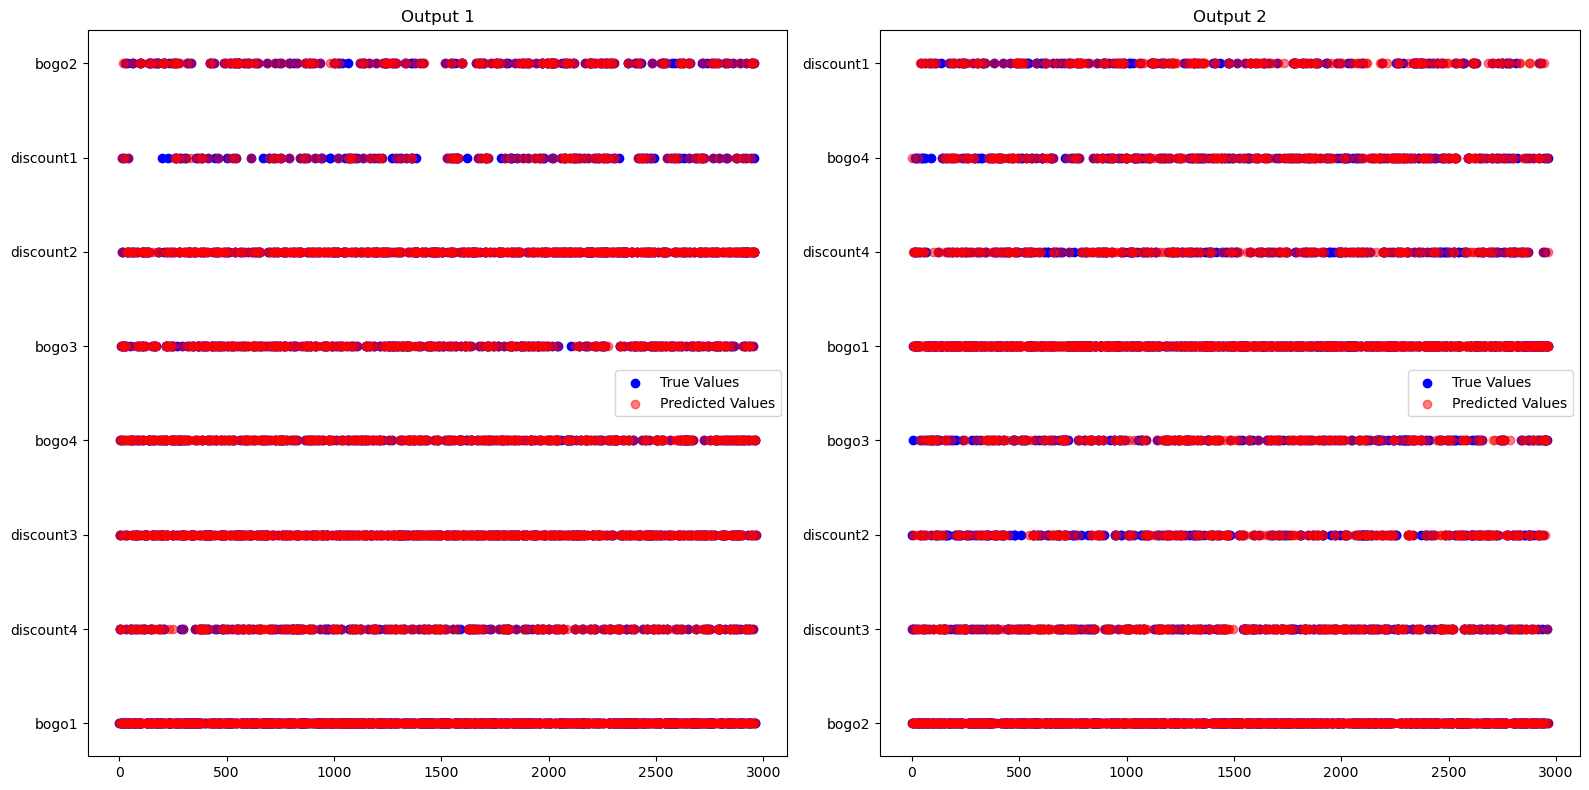

In [78]:
num_rows = y_test.shape[0]

#Create 2 subgraphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Display a scatter plot for each output column
for i in range(2):
    axes[i].scatter(range(num_rows), y_test.values[:, i], label='True Values', color='blue')
    axes[i].scatter(range(num_rows), y_pred[:, i], label='Predicted Values', color='red', alpha=0.5)
    axes[i].set_title(f'Output {i+1}')
    axes[i].legend()

#Adjust sub-picture layout
plt.tight_layout()
plt.show()

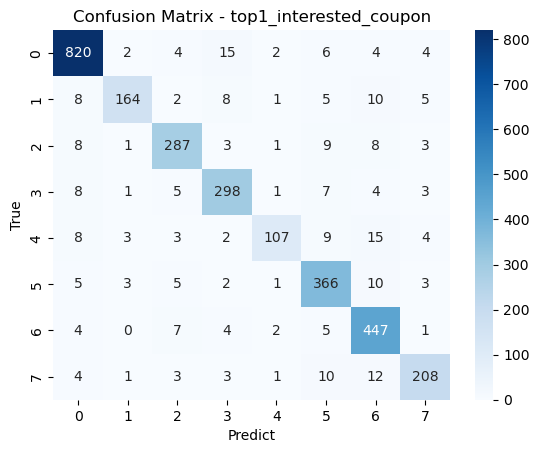

TP: 164, TN: 820, FP: 2, FN: 8


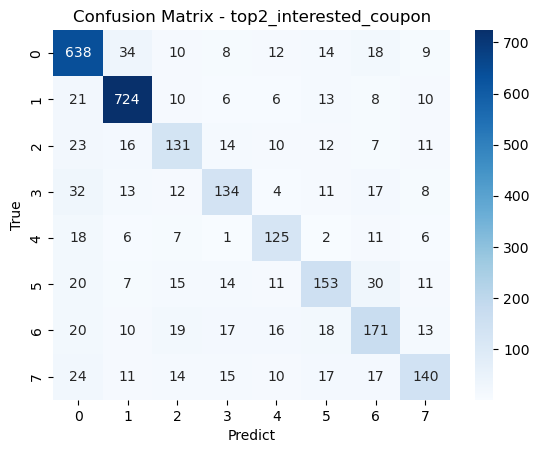

TP: 724, TN: 638, FP: 34, FN: 21
Classification Report - top1:
               precision    recall  f1-score   support

       bogo1       0.95      0.96      0.95       857
       bogo2       0.94      0.81      0.87       203
       bogo3       0.91      0.90      0.90       320
       bogo4       0.89      0.91      0.90       327
   discount1       0.92      0.71      0.80       151
   discount2       0.88      0.93      0.90       395
   discount3       0.88      0.95      0.91       470
   discount4       0.90      0.86      0.88       242

    accuracy                           0.91      2965
   macro avg       0.91      0.88      0.89      2965
weighted avg       0.91      0.91      0.91      2965

Classification Report - top2:
               precision    recall  f1-score   support

       bogo1       0.80      0.86      0.83       743
       bogo2       0.88      0.91      0.89       798
       bogo3       0.60      0.58      0.59       224
       bogo4       0.64      0.58    

In [83]:
# Use MultiLabelBinarizer to binary encode y_test
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)

# 1. Confusion Matrix - first column
y_pred = model.predict(X_test)
conf_mat_col1 = confusion_matrix(y_test.iloc[:, 0], y_pred[:, 0])

# Visualize the confusion matrix using heatmaps
sns.heatmap(conf_mat_col1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix - top1_interested_coupon')
plt.show()

TP = conf_mat_col1[1, 1]
TN = conf_mat_col1[0, 0]
FP = conf_mat_col1[0, 1]
FN = conf_mat_col1[1, 0]
print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')

# 2. Confusion Matrix - second column
conf_mat_col2 = confusion_matrix(y_test.iloc[:, 1], y_pred[:, 1])

# Visualize the confusion matrix using heatmaps
sns.heatmap(conf_mat_col2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix - top2_interested_coupon')
plt.show()

TP = conf_mat_col2[1, 1]
TN = conf_mat_col2[0, 0]
FP = conf_mat_col2[0, 1]
FN = conf_mat_col2[1, 0]
print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')

# 3. Classification Report - first column
class_report_col1 = classification_report(y_test.iloc[:, 0], y_pred[:, 0])
print("Classification Report - top1:\n", class_report_col1)

# 4. Classification Report - second column
class_report_col2 = classification_report(y_test.iloc[:, 1], y_pred[:, 1])
print("Classification Report - top2:\n", class_report_col2)